### Data loading utils

In [5]:
# See: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

from re import I
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd

STANCE_MAP = {
    'agree':0,
    'disagree':1,
    'discuss':2,
    'unrelated':3,
}

class FakeNewsDataset(Dataset):
    def __init__(self, stances_file=None, bodies_file=None, related_only=False):
        self.stances = pd.read_csv(stances_file) if stances_file else None
        self.bodies = pd.read_csv(bodies_file) if bodies_file else None
        if related_only:
            self.stances.drop(self.stances[self.stances['Stance'] == 'unrelated'].index, inplace=True)

    def set_df(self, stances_df, bodies_df):
        self.stances = stances_df
        self.bodies = bodies_df

    def __len__(self):
        return len(self.stances)
    
    def __getitem__(self, idx):
        headline, body_id, stance = self.stances.iloc[idx]
        select = self.bodies['Body ID'] == body_id
        body = self.bodies[select]['articleBody'].values[0]
        return (headline, body), STANCE_MAP[stance]

data = FakeNewsDataset('../data/combined_stances_train.csv', '../data/combined_bodies_train.csv', related_only=True)
dataloader = DataLoader(data)

In [14]:
from nltk.tokenize import sent_tokenize

MAX_LEN = 50

def pad_truncate(X, K=MAX_LEN):
    '''
    X will be padded with '' or truncated so that it is of length K
    X: array to be padded or truncated
    K: the length you want the output array to be
    '''
    if len(X) > K:
        X = X[:K]
    padding = ['[PAD]' for i in range(max(0, K - len(X)))]
    return X + padding

def pad_tokenize(X):
    '''
    Preprocess the bodies
    '''
    X_tok = list(map(sent_tokenize, X))
    return list(map(pad_truncate, X_tok))

### Where does the similarity lie?

In [6]:
from sentence_transformers import SentenceTransformer
sim_encoder = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [28]:
import numpy as np
SUBSET_SIZE = 1000
sims = np.zeros((SUBSET_SIZE, 50))
for i, ((h, b), y) in enumerate(dataloader):
    print(f'i:{i}/{SUBSET_SIZE}')
    B = pad_tokenize(b)
    if i > SUBSET_SIZE:
        break
    head_encoding = sim_encoder.encode(h)
    sims_row = []
    for j, body in enumerate(B[0]):
        if body == '[PAD]':
            continue
        body_encoding = sim_encoder.encode(body)
        sims[i,j] = np.dot(head_encoding, body_encoding)

i:0/1000
i:1/1000
i:2/1000
i:3/1000
i:4/1000
i:5/1000
i:6/1000
i:7/1000
i:8/1000
i:9/1000
i:10/1000
i:11/1000
i:12/1000
i:13/1000
i:14/1000
i:15/1000
i:16/1000
i:17/1000
i:18/1000
i:19/1000
i:20/1000
i:21/1000
i:22/1000
i:23/1000
i:24/1000
i:25/1000
i:26/1000
i:27/1000
i:28/1000
i:29/1000
i:30/1000
i:31/1000
i:32/1000
i:33/1000
i:34/1000
i:35/1000
i:36/1000
i:37/1000
i:38/1000
i:39/1000
i:40/1000
i:41/1000
i:42/1000
i:43/1000
i:44/1000
i:45/1000
i:46/1000
i:47/1000
i:48/1000
i:49/1000
i:50/1000
i:51/1000
i:52/1000
i:53/1000
i:54/1000
i:55/1000
i:56/1000
i:57/1000
i:58/1000
i:59/1000
i:60/1000
i:61/1000
i:62/1000
i:63/1000
i:64/1000
i:65/1000
i:66/1000
i:67/1000
i:68/1000
i:69/1000
i:70/1000
i:71/1000
i:72/1000
i:73/1000
i:74/1000
i:75/1000
i:76/1000
i:77/1000
i:78/1000
i:79/1000
i:80/1000
i:81/1000
i:82/1000
i:83/1000
i:84/1000
i:85/1000
i:86/1000
i:87/1000
i:88/1000
i:89/1000
i:90/1000
i:91/1000
i:92/1000
i:93/1000
i:94/1000
i:95/1000
i:96/1000
i:97/1000
i:98/1000
i:99/1000
i:100/1000

i:755/1000
i:756/1000
i:757/1000
i:758/1000
i:759/1000
i:760/1000
i:761/1000
i:762/1000
i:763/1000
i:764/1000
i:765/1000
i:766/1000
i:767/1000
i:768/1000
i:769/1000
i:770/1000
i:771/1000
i:772/1000
i:773/1000
i:774/1000
i:775/1000
i:776/1000
i:777/1000
i:778/1000
i:779/1000
i:780/1000
i:781/1000
i:782/1000
i:783/1000
i:784/1000
i:785/1000
i:786/1000
i:787/1000
i:788/1000
i:789/1000
i:790/1000
i:791/1000
i:792/1000
i:793/1000
i:794/1000
i:795/1000
i:796/1000
i:797/1000
i:798/1000
i:799/1000
i:800/1000
i:801/1000
i:802/1000
i:803/1000
i:804/1000
i:805/1000
i:806/1000
i:807/1000
i:808/1000
i:809/1000
i:810/1000
i:811/1000
i:812/1000
i:813/1000
i:814/1000
i:815/1000
i:816/1000
i:817/1000
i:818/1000
i:819/1000
i:820/1000
i:821/1000
i:822/1000
i:823/1000
i:824/1000
i:825/1000
i:826/1000
i:827/1000
i:828/1000
i:829/1000
i:830/1000
i:831/1000
i:832/1000
i:833/1000
i:834/1000
i:835/1000
i:836/1000
i:837/1000
i:838/1000
i:839/1000
i:840/1000
i:841/1000
i:842/1000
i:843/1000
i:844/1000
i:845/1000

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [33]:
sims.sum(0)

array([568.53206207, 410.15304923, 367.03013565, 350.78238467,
       320.0943112 , 309.32672985, 280.99984368, 255.87095246,
       246.00177501, 211.20542263, 202.04281514, 186.97849336,
       175.74028003, 160.7569593 , 148.92289334, 129.26392701,
       111.94564389, 102.24910073,  85.33689916,  76.52223143,
        70.37312491,  65.3237384 ,  56.46808496,  50.93163822,
        47.14571417,  50.53475632,  48.94372132,  39.53760691,
        37.34523126,  30.18457814,  28.5633884 ,  26.27418611,
        23.75558389,  20.34058176,  16.43080145,  17.76112065,
        15.89431312,  15.5600853 ,  14.87524243,  13.9236025 ,
        12.55501733,  11.3012403 ,  12.05620867,  11.71700368,
         8.8406022 ,   9.25638782,   6.92360331,   7.27722829,
         5.06034751,   6.5529161 ])

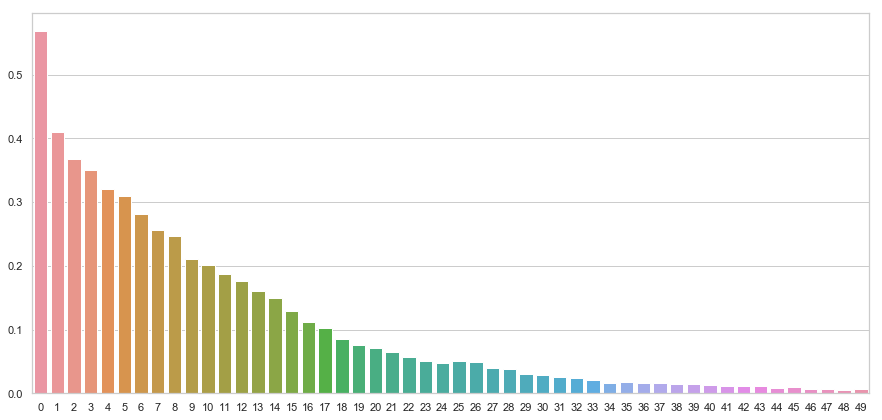

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
ax, fig = plt.subplots(figsize=[15,7])

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=list(range(sims.shape[1])), y=sims.mean(0))